In [3]:
rm(list=ls())
library(reshape2)
library(limma)

Warning message:
"package 'limma' was built under R version 4.1.3"


In [4]:
data = read.table("GSE118553_non-normalized_data.txt", header = TRUE, sep = "\t", row.names = 1)
#Conversion_table = unique(data[,2:3])

In [5]:
data

X9031292027_A X9031292027_A_Detection_Pval X9031292027_B
ILMN_1735042  83.7         0.74805                       90.7        
ILMN_2194108  86.6         0.57403                       85.9        
ILMN_1797786  94.9         0.18701                      104.1        
ILMN_1688790 107.8         0.05974                      110.5        
ILMN_1651767  86.0         0.60390                       86.5        
ILMN_1812702  83.6         0.74805                       81.5        
ILMN_1741224  97.2         0.15195                      101.4        
ILMN_1663099  82.1         0.82468                       93.6        
ILMN_1831907 101.1         0.09740                       95.0        
ILMN_2196328  86.9         0.55065                       89.9        
ILMN_1887823 100.9         0.09870                      111.9        
ILMN_1777322  92.6         0.26753                      101.8        
ILMN_1770385  86.0         0.60390                       85.0        
ILMN_1720162  94.5         0.19740                       92.4        
ILMN_1783075  99.3         0.11948                       95.9        
ILMN_1681576  85.7         0.61429                       86.7        
ILMN_1661968  99.8         0.10909                       99.3        
ILMN_1752967 100.9         0.09740                      134.7        
ILMN_1708631  99.9         0.10909                      101.7        
ILMN_1657816  95.6         0.17792                      103.5        
ILMN_1668507 174.9         0.00909                      292.3        
ILMN_3267665  89.3         0.42078                       89.1        
ILMN_1690922 215.2         0.00000                      219.6        
ILMN_1676602  93.1         0.24935                      109.2        
ILMN_1723685  96.5         0.15714                      109.4        
ILMN_2401946  83.1         0.77922                       96.6        
ILMN_1771643  85.9         0.60519                       89.6        
ILMN_3285568  83.7         0.74286                       93.9        
ILMN_2363498  84.9         0.65974                       85.9        
ILMN_1681857  83.1         0.77922                       84.8        
...          ...           ...                          ...          
ILMN_1655849  94.9         0.18831                       93.4        
ILMN_1771223 107.2         0.05974                      109.6        
ILMN_1729320  85.8         0.60779                       88.3        
ILMN_3310603  87.3         0.53636                       87.8        
ILMN_2217601  81.5         0.84416                       79.5        
ILMN_1803773 157.1         0.01558                      186.8        
ILMN_3282517 117.2         0.04545                      140.6        
ILMN_1676016  81.6         0.84416                       89.9        
ILMN_1808583  90.1         0.37662                       86.9        
ILMN_1658713  83.1         0.77792                       79.9        
ILMN_3176875  93.1         0.24935                      100.2        
ILMN_1699214  95.9         0.17532                       95.5        
ILMN_3236102  97.1         0.15195                      100.6        
ILMN_1731275  81.3         0.85195                       82.8        
ILMN_3176840 108.1         0.05974                      129.3        
ILMN_1804384  93.1         0.25325                       98.5        
ILMN_2168449 108.7         0.05714                      137.4        
ILMN_2298888 145.1         0.01688                      134.3        
ILMN_1725075  86.3         0.58312                       93.4        
ILMN_1745558  85.7         0.61039                       84.8        
ILMN_1893667 128.8         0.02987                      119.3        
ILMN_1712859  89.6         0.41039                       91.0        
ILMN_1747129  81.8         0.84026                       83.6        
ILMN_1813344 101.2         0.09740                      159.8        
ILMN_2292576  81.5         0.84545                       87.4        
ILMN_1793445 101.8     

In [6]:
GE <- data[ , seq(1, ncol(data), by = 2)]
GE

X9031292027_A X9031292027_B X9031292027_C X9031292027_D
ILMN_1735042  83.7          90.7          86.1          91.6        
ILMN_2194108  86.6          85.9          87.2          79.3        
ILMN_1797786  94.9         104.1         102.7          94.8        
ILMN_1688790 107.8         110.5         104.7         100.1        
ILMN_1651767  86.0          86.5          89.0          82.2        
ILMN_1812702  83.6          81.5          81.8          82.4        
ILMN_1741224  97.2         101.4         108.9          93.9        
ILMN_1663099  82.1          93.6          93.7          84.5        
ILMN_1831907 101.1          95.0         107.3          92.8        
ILMN_2196328  86.9          89.9          92.4          97.9        
ILMN_1887823 100.9         111.9         117.1         112.7        
ILMN_1777322  92.6         101.8          98.1          91.1        
ILMN_1770385  86.0          85.0          85.6          80.2        
ILMN_1720162  94.5          92.4          87.2          90.9        
ILMN_1783075  99.3          95.9          97.5          88.8        
ILMN_1681576  85.7          86.7          81.7          87.6        
ILMN_1661968  99.8          99.3         103.9          99.6        
ILMN_1752967 100.9         134.7         134.5         127.5        
ILMN_1708631  99.9         101.7          94.5          92.9        
ILMN_1657816  95.6         103.5         102.2          97.5        
ILMN_1668507 174.9         292.3         265.8         146.2        
ILMN_3267665  89.3          89.1          97.7          84.9        
ILMN_1690922 215.2         219.6         202.1         168.3        
ILMN_1676602  93.1         109.2         119.8          83.7        
ILMN_1723685  96.5         109.4         104.7         103.4        
ILMN_2401946  83.1          96.6          93.1          93.7        
ILMN_1771643  85.9          89.6          95.5          95.8        
ILMN_3285568  83.7          93.9          94.1          94.8        
ILMN_2363498  84.9          85.9          84.0          79.9        
ILMN_1681857  83.1          84.8          86.4          78.4        
...          ...           ...           ...           ...          
ILMN_1655849  94.9          93.4          93.6          81.5        
ILMN_1771223 107.2         109.6         100.7         112.1        
ILMN_1729320  85.8          88.3          98.8          93.1        
ILMN_3310603  87.3          87.8          86.6          86.6        
ILMN_2217601  81.5          79.5          80.0          81.7        
ILMN_1803773 157.1         186.8         167.5         180.6        
ILMN_3282517 117.2         140.6         142.6         130.3        
ILMN_1676016  81.6          89.9          90.5          75.8        
ILMN_1808583  90.1          86.9          87.1          85.4        
ILMN_1658713  83.1          79.9          87.4          85.4        
ILMN_3176875  93.1         100.2          87.3          93.0        
ILMN_1699214  95.9          95.5          95.6          92.3        
ILMN_3236102  97.1         100.6          95.2         101.7        
ILMN_1731275  81.3          82.8          78.6          82.2        
ILMN_3176840 108.1         129.3         136.6         117.8        
ILMN_1804384  93.1          98.5          84.9          84.7        
ILMN_2168449 108.7         137.4         137.7         105.3        
ILMN_2298888 145.1         134.3         129.1         111.0        
ILMN_1725075  86.3          93.4          90.7          83.3        
ILMN_1745558  85.7          84.8          85.4          78.9        
ILMN_1893667 128.8         119.3         112.6         104.7        
ILMN_1712859  89.6          91.0          84.9          89.5        
ILMN_1747129  81.8          83.6          87.0          77.2        
ILMN_1813344 101.2         159.8         152.3         116.6        
ILMN_2292576  81.5          87.4          85.8          81.2        
ILMN_1793445 101.8         110.7          95.2         102.5        
ILMN_206527

In [7]:
pval <- data[ , seq(2, ncol(data), by = 2)]
names(pval) <- gsub("_Detection_Pval", "", names(pval))
pval

X9031292027_A X9031292027_B X9031292027_C X9031292027_D
ILMN_1735042 0.74805       0.46753       0.68442       0.30130      
ILMN_2194108 0.57403       0.76753       0.64286       0.93506      
ILMN_1797786 0.18701       0.09870       0.08571       0.20260      
ILMN_1688790 0.05974       0.06623       0.07143       0.12078      
ILMN_1651767 0.60390       0.73117       0.51818       0.83117      
ILMN_1812702 0.74805       0.93247       0.87792       0.81039      
ILMN_1741224 0.15195       0.11948       0.05065       0.21948      
ILMN_1663099 0.82468       0.33506       0.27013       0.70260      
ILMN_1831907 0.09740       0.25714       0.05844       0.25844      
ILMN_2196328 0.55065       0.52987       0.33117       0.14545      
ILMN_1887823 0.09870       0.06234       0.03247       0.04286      
ILMN_1777322 0.26753       0.11948       0.14286       0.32597      
ILMN_1770385 0.60390       0.80130       0.71948       0.91169      
ILMN_1720162 0.19740       0.37013       0.64286       0.33377      
ILMN_1783075 0.11948       0.21818       0.16104       0.43506      
ILMN_1681576 0.61429       0.71818       0.88182       0.49481      
ILMN_1661968 0.10909       0.15455       0.07403       0.12338      
ILMN_1752967 0.09740       0.02727       0.01688       0.02208      
ILMN_1708631 0.10909       0.11948       0.23766       0.25714      
ILMN_1657816 0.17792       0.10130       0.08961       0.15325      
ILMN_1668507 0.00909       0.00000       0.00000       0.00649      
ILMN_3267665 0.42078       0.57273       0.15195       0.66753      
ILMN_1690922 0.00000       0.00130       0.00000       0.00260      
ILMN_1676602 0.24935       0.07013       0.02987       0.74416      
ILMN_1723685 0.15714       0.07013       0.07143       0.07792      
ILMN_2401946 0.77922       0.20519       0.29221       0.22468      
ILMN_1771643 0.60519       0.53766       0.20000       0.17792      
ILMN_3285568 0.74286       0.30779       0.25325       0.20130      
ILMN_2363498 0.65974       0.76753       0.79870       0.91948      
ILMN_1681857 0.77922       0.80649       0.67273       0.95325      
...          ...           ...           ...           ...          
ILMN_1655849 0.18831       0.33766       0.27662       0.85714      
ILMN_1771223 0.05974       0.07013       0.10000       0.04416      
ILMN_1729320 0.60779       0.63117       0.12338       0.24935      
ILMN_3310603 0.53636       0.65714       0.66753       0.57662      
ILMN_2217601 0.84416       0.97662       0.93377       0.84286      
ILMN_1803773 0.01558       0.00519       0.00260       0.00260      
ILMN_3282517 0.04545       0.01688       0.01169       0.02078      
ILMN_1676016 0.84416       0.52727       0.42597       0.98312      
ILMN_1808583 0.37662       0.70519       0.64805       0.64935      
ILMN_1658713 0.77792       0.96883       0.63377       0.64935      
ILMN_3176875 0.24935       0.13636       0.64026       0.25325      
ILMN_1699214 0.17532       0.23896       0.19870       0.28312      
ILMN_3236102 0.15195       0.12338       0.21039       0.10649      
ILMN_1731275 0.85195       0.89740       0.96494       0.83117      
ILMN_3176840 0.05974       0.03117       0.01688       0.03117      
ILMN_1804384 0.25325       0.16753       0.74935       0.68312      
ILMN_2168449 0.05714       0.01818       0.01688       0.06623      
ILMN_2298888 0.01688       0.02727       0.02208       0.04805      
ILMN_1725075 0.58312       0.33766       0.40779       0.76623      
ILMN_1745558 0.61039       0.80519       0.72987       0.94286      
ILMN_1893667 0.02987       0.04026       0.03766       0.07143      
ILMN_1712859 0.41039       0.45455       0.75195       0.39740      
ILMN_1747129 0.84026       0.86883       0.65455       0.95974      
ILMN_1813344 0.09740       0.01039       0.00909       0.03377      
ILMN_2292576 0.84545       0.67662       0.70260       0.86623      
ILMN_1793445 0.09351       0.06623       0.21429       0.09221      
ILMN_206527

In [8]:
identical(names(GE), names(pval))

[1] TRUE

In [9]:
# normalized expression after background correction and transformation
GE_bgCorrected = neqc(GE, detection.p= pval)

In [10]:
GE_bgCorrected

X9031292027_A X9031292027_B X9031292027_C X9031292027_D
ILMN_1735042 4.565431      4.620506      4.559631      4.734837     
ILMN_2194108 4.615890      4.547055      4.575286      4.504773     
ILMN_1797786 4.889857      4.936210      4.937237      4.854300     
ILMN_1688790 5.611429      5.122808      4.999549      5.132119     
ILMN_1651767 4.604044      4.555368      4.602647      4.541279     
ILMN_1812702 4.563890      4.492918      4.508607      4.544233     
ILMN_1741224 5.014015      4.861136      5.136658      4.816770     
ILMN_1663099 4.541721      4.672975      4.692088      4.575090     
ILMN_1831907 5.240874      4.701933      5.081763      4.774699     
ILMN_2196328 4.622119      4.607553      4.664589      5.006814     
ILMN_1887823 5.227990      5.164516      5.403533      5.787670     
ILMN_1777322 4.788375      4.872061      4.802003      4.719240     
ILMN_1770385 4.604044      4.534801      4.552944      4.515556     
ILMN_1720162 4.870659      4.650512      4.575286      4.713242     
ILMN_1783075 5.135031      4.721354      4.785158      4.657857     
ILMN_1681576 4.598395      4.558114      4.507491      4.631101     
ILMN_1661968 5.165829      4.802650      4.974466      5.102665     
ILMN_1752967 5.227990      5.813443      5.918213      6.362809     
ILMN_1708631 5.172299      4.869407      4.710155      4.778183     
ILMN_1657816 4.927113      4.919993      4.922946      4.986707     
ILMN_1668507 7.489311      7.926742      7.766385      6.890013     
ILMN_3267665 4.679127      4.594247      4.790732      4.581468     
ILMN_1690922 8.077573      7.262525      7.163811      7.339534     
ILMN_1676602 4.808861      5.082457      5.482378      4.562592     
ILMN_1723685 4.975479      5.088326      4.999549      5.318040     
ILMN_2401946 4.556318      4.737494      4.679354      4.808586     
ILMN_1771643 4.602129      4.602309      4.734520      4.902027     
ILMN_3285568 4.565431      4.678998      4.700881      4.854300     
ILMN_2363498 4.584843      4.547055      4.533237      4.512171     
ILMN_1681857 4.556318      4.532262      4.563679      4.494397     
...          ...           ...           ...           ...          
ILMN_1655849 4.889857      4.669471      4.689978      4.531936     
ILMN_1771223 5.582514      5.095000      4.876183      5.761966     
ILMN_1729320 4.600193      4.581782      4.820587      4.785787     
ILMN_3310603 4.630479      4.574639      4.566317      4.611461     
ILMN_2217601 4.533163      4.471909      4.488804      4.534393     
ILMN_1803773 7.152012      6.816895      6.635884      7.554871     
ILMN_3282517 6.023583      5.961406      6.120042      6.451810     
ILMN_1676016 4.534437      4.607553      4.628143      4.467828     
ILMN_1808583 4.702417      4.560923      4.573610      4.589658     
ILMN_1658713 4.556318      4.476243      4.578285      4.589658     
ILMN_3176875 4.808861      4.826884      4.576767      4.781798     
ILMN_1699214 4.942669      4.712610      4.737216      4.757201     
ILMN_3236102 5.008663      4.838193      4.727069      5.223467     
ILMN_1731275 4.530441      4.507354      4.474771      4.541279     
ILMN_3176840 5.626206      5.668067      5.970106      6.010599     
ILMN_1804384 4.808861      4.783116      4.543972      4.578299     
ILMN_2168449 5.656033      5.881869      6.000818      5.420754     
ILMN_2298888 6.875215      5.803155      5.763514      5.711722     
ILMN_1725075 4.610001      4.669471      4.631425      4.556816     
ILMN_1745558 4.598395      4.532262      4.550330      4.499983     
ILMN_1893667 6.429903      5.391958      5.258392      5.387825     
ILMN_1712859 4.687680      4.625709      4.543972      4.674730     
ILMN_1747129 4.537074      4.516946      4.572032      4.481283     
ILMN_1813344 5.247142      6.379846      6.340432      5.962560     
ILMN_2292576 4.533163      4.568382      4.555557      4.528126     
ILMN_1793445 5.279879      5.129223      4.727069      5.267216     
ILMN_206527

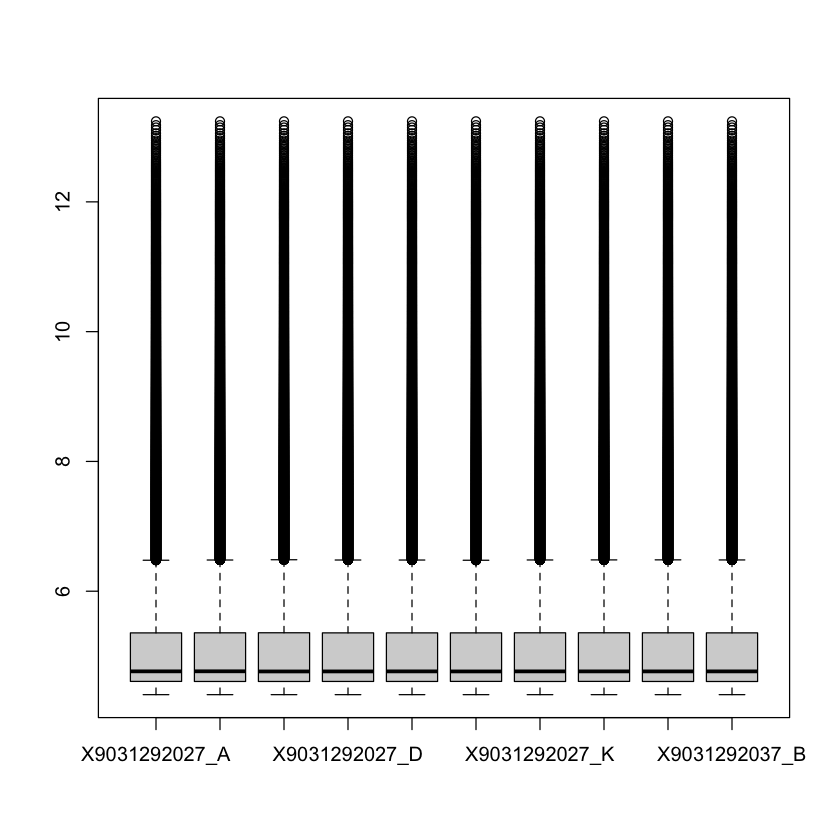

In [11]:
boxplot(GE_bgCorrected[, seq(1,10)])

In [12]:
# In each prob, how many patients have p-value less than 0.05
lowpval_probs_counts = apply(pval, 1, function(x){sum(x<.05)})
lowpval_probs_counts

ILMN_1735042 ILMN_2194108 ILMN_1797786 ILMN_1688790 ILMN_1651767 ILMN_1812702 
           1            1           66            8            4            0 
ILMN_1741224 ILMN_1663099 ILMN_1831907 ILMN_2196328 ILMN_1887823 ILMN_1777322 
         149          199           64            0          162          173 
ILMN_1770385 ILMN_1720162 ILMN_1783075 ILMN_1681576 ILMN_1661968 ILMN_1752967 
           0            8            7            1           67          312 
ILMN_1708631 ILMN_1657816 ILMN_1668507 ILMN_3267665 ILMN_1690922 ILMN_1676602 
           0          210          401            4          393          215 
ILMN_1723685 ILMN_2401946 ILMN_1771643 ILMN_3285568 ILMN_2363498 ILMN_1681857 
          32            0            0            0            0            0 
ILMN_1735157 ILMN_3248586 ILMN_1658472 ILMN_1845076 ILMN_1740339 ILMN_1795511 
         174          347            8           36            1            0 
ILMN_1719864 ILMN_1702321 ILMN_1661650 ILMN_1768433 ILMN_3247597 ILMN_1765923 
         317            0          316            0            0            4 
ILMN_1683494 ILMN_1716259 ILMN_1652890 ILMN_2274531 ILMN_3308225 ILMN_3284078 
           4           13            1          336          376            1 
ILMN_1745817 ILMN_1728121 ILMN_3201614 ILMN_1685929 ILMN_1661596 ILMN_1750250 
         300            0          235            0          390            0 
ILMN_3288238 ILMN_2361920 ILMN_2242463 ILMN_3301556 ILMN_1901023 ILMN_1664136 
          53            0           88            0            0            0 
ILMN_2336037 ILMN_1670274 ILMN_1748235 ILMN_2151241 ILMN_1664008 ILMN_1660797 
           0            0            0            0          210           90 
ILMN_1776490 ILMN_2331544 ILMN_1754562 ILMN_1902604 ILMN_2323427 ILMN_2041368 
           0          401          231          371           42          401 
ILMN_1803357 ILMN_1869761 ILMN_1727574 ILMN_1714602 ILMN_1708706 ILMN_3307108 
           0            0          165           62            0           59 
ILMN_1658631 ILMN_1663015 ILMN_1675376 ILMN_1730223 ILMN_1806432 ILMN_1676003 
          47           18           82            2          366            0 
ILMN_2091454 ILMN_3220769 ILMN_1746376 ILMN_1659270 ILMN_3284994 ILMN_1665996 
           0          228           94          139          397            8 
ILMN_1809601 ILMN_2412564 ILMN_3244898 ILMN_2407669 ILMN_1722900 ILMN_2204297 
           0          371           12          184          395          151 
ILMN_1765633 ILMN_3308971 ILMN_1685531 ILMN_1809439 ILMN_2063586 ILMN_1660412 
         365            0            0          401          345           16 
ILMN_1763999 ILMN_1761049 ILMN_2164978 ILMN_1752917 ILMN_2059689 ILMN_1737426 
           0          314          271          350          122          401 
ILMN_1664776 ILMN_3308270 ILMN_1739744 ILMN_1714749 ILMN_1685096 ILMN_1767441 
         399            0          381            0          270           12 
ILMN_1808923 ILMN_1739756 ILMN_1745256 ILMN_1681855 ILMN_1763537 ILMN_2100209 
           0            0          395          220            0           10 
ILMN_2365479 ILMN_1682518 ILMN_3181457 ILMN_1848913 ILMN_2045994 ILMN_1791232 
         291          139           28          138          356          253 
ILMN_1654413 ILMN_1814701 ILMN_1813379 ILMN_3303162 ILMN_2348146 ILMN_1874126 
          23           30           51           51            3          230 
ILMN_1720976 ILMN_2126399 ILMN_2175737 ILMN_1695621 ILMN_1786034 ILMN_1806908 
           0           59          399            0          401          208 
ILMN_1657237 ILMN_1856533 ILMN_2370365 ILMN_1716421 ILMN_1714412 ILMN_1875080 
           0          232           31            0          400          286 
ILMN_2405756 ILMN_3268883 ILMN_1753913 ILMN_1872104 ILMN_1791777 ILMN_1796141 
          51            0          213           24            8           82 
ILMN_1749755 ILMN_1723515 ILMN_1771537 ILMN_165178

In [13]:
# For each prob, we should have p-value less than 0.05 at least for P1 patients
P1 = 10
GE_with_low_pval = GE_bgCorrected[lowpval_probs_counts>P1,]

In [14]:
GE_with_low_pval

X9031292027_A X9031292027_B X9031292027_C X9031292027_D
ILMN_1797786  4.889857      4.936210      4.937237      4.854300    
ILMN_1741224  5.014015      4.861136      5.136658      4.816770    
ILMN_1663099  4.541721      4.672975      4.692088      4.575090    
ILMN_1831907  5.240874      4.701933      5.081763      4.774699    
ILMN_1887823  5.227990      5.164516      5.403533      5.787670    
ILMN_1777322  4.788375      4.872061      4.802003      4.719240    
ILMN_1661968  5.165829      4.802650      4.974466      5.102665    
ILMN_1752967  5.227990      5.813443      5.918213      6.362809    
ILMN_1657816  4.927113      4.919993      4.922946      4.986707    
ILMN_1668507  7.489311      7.926742      7.766385      6.890013    
ILMN_1690922  8.077573      7.262525      7.163811      7.339534    
ILMN_1676602  4.808861      5.082457      5.482378      4.562592    
ILMN_1723685  4.975479      5.088326      4.999549      5.318040    
ILMN_1735157  5.135031      5.060084      4.986855      5.398313    
ILMN_3248586  4.743687      4.795351      4.876183      4.583147    
ILMN_1845076  5.587252      5.318223      4.949625      5.336794    
ILMN_1719864  5.207054      5.614088      5.535600      5.903325    
ILMN_1661650  5.423169      5.148446      5.501487      5.368476    
ILMN_1716259  5.106471      4.802650      5.249145      5.120395    
ILMN_2274531  5.893531      5.176361      5.236417      5.038946    
ILMN_3308225  8.562639      7.022175      6.827642      7.442557    
ILMN_1745817  5.060084      8.277096      8.600797      6.858847    
ILMN_3201614  5.502113      4.986932      5.133057      5.387825    
ILMN_1661596  7.918300      7.451164      6.588890      7.433379    
ILMN_3288238  5.703080      5.377500      4.940358      5.296013    
ILMN_2242463  5.285850      4.925426      5.107143      4.672073    
ILMN_1664008  6.519752      5.727680      5.348851      5.820906    
ILMN_1660797  5.178564      5.008426      4.852356      4.940668    
ILMN_2331544 11.179624     10.363833     10.098413     11.944455    
ILMN_1754562  5.252840      5.095000      5.386030      4.753787    
...          ...           ...           ...           ...          
ILMN_1758545  5.123314     4.922852      4.817900       5.296013    
ILMN_2216265  5.591790     4.849196      5.400230       5.267216    
ILMN_1716278  5.258679     5.312772      5.227636       4.981974    
ILMN_3246097  4.646388     4.646778      4.542609       4.710394    
ILMN_1815326  4.624230     4.638206      4.809865       4.789607    
ILMN_2229242  5.875234     6.324885      6.067638       5.931201    
ILMN_1805371  5.962983     5.881869      5.921070       6.160218    
ILMN_1683891  4.699438     4.797791      4.705444       4.548209    
ILMN_1894186  5.315352     4.936210      4.694032       5.155697    
ILMN_2132458  6.951352     6.341382      5.973029       6.457306    
ILMN_1657595  5.833398     5.775156      5.751576       6.942529    
ILMN_1886254  4.937016     4.749295      4.820587       5.120395    
ILMN_1766499 10.152319     8.815926      8.294443      10.943820    
ILMN_2393456  4.792406     4.739969      4.660385       4.829323    
ILMN_1707323  4.668437     4.612476      4.660385       4.785787    
ILMN_1719975  4.804795     4.913779      4.952783       4.971544    
ILMN_1771223  5.582514     5.095000      4.876183       5.761966    
ILMN_1803773  7.152012     6.816895      6.635884       7.554871    
ILMN_3282517  6.023583     5.961406      6.120042       6.451810    
ILMN_1676016  4.534437     4.607553      4.628143       4.467828    
ILMN_3236102  5.008663     4.838193      4.727069       5.223467    
ILMN_3176840  5.626206     5.668067      5.970106       6.010599    
ILMN_2168449  5.656033     5.881869      6.000818       5.420754    
ILMN_2298888  6.875215     5.803155      5.763514       5.711722    
ILMN_1893667  6.429903     5.391958      5.258392       5.387825    
ILMN_1813344  5.247142     6.379846      6.340432       5.962560    
ILMN_206527

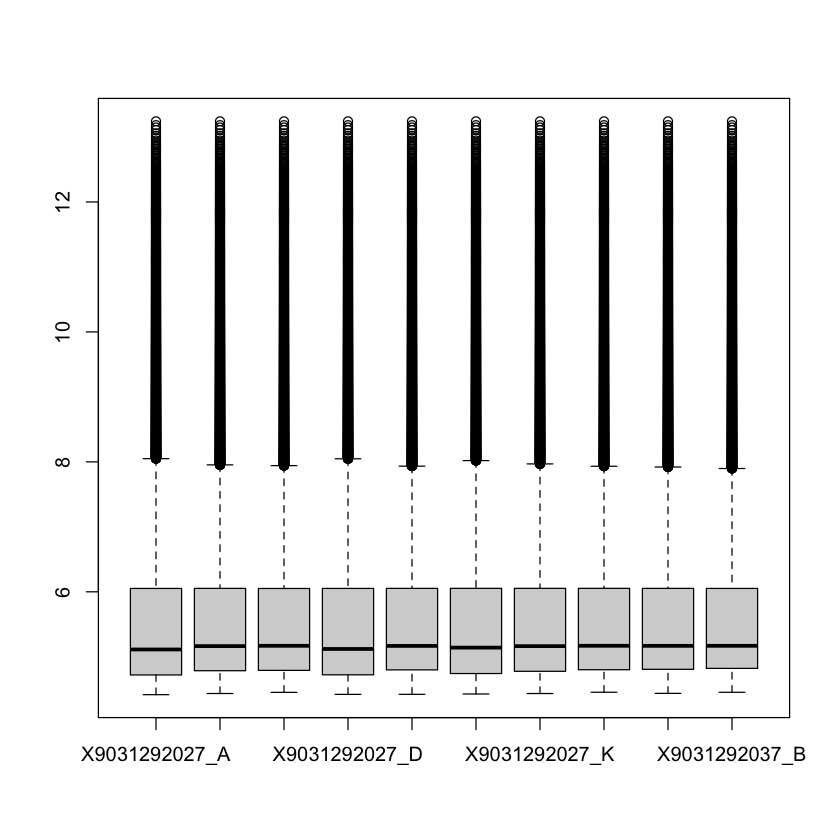

In [15]:
boxplot(GE_with_low_pval[, seq(1,10)])

In [22]:
#the columns ID and ILMN_Gene extracted with pandas in Python
#IDs that are not mapped to any genes are excluded from the table
gpl = read.table("GPL10558-genes-mapping.txt", sep = "\t", header = TRUE,)
gpl

ID           ILMN_Gene  
1     ILMN_1343291 EEF1A1     
2     ILMN_1343295 GAPDH      
3     ILMN_1651199 LOC643334  
4     ILMN_1651209 SLC35E2    
5     ILMN_1651210 DUSP22     
6     ILMN_1651221 LOC642820  
7     ILMN_1651228 RPS28      
8     ILMN_1651229 IPO13      
9     ILMN_1651230 TESSP1     
10    ILMN_1651232 LOC653113  
11    ILMN_1651235 AFAP1      
12    ILMN_1651236 GGTLC1     
13    ILMN_1651237 CDT1       
14    ILMN_1651238 TRPV1      
15    ILMN_1651249 LOC652879  
16    ILMN_1651253 LOC644150  
17    ILMN_1651254 LPP        
18    ILMN_1651259 FLJ36848   
19    ILMN_1651260 CCNE2      
20    ILMN_1651262 HNRNPAB    
21    ILMN_1651268 LOH12CR1   
22    ILMN_1651278 SNIP1      
23    ILMN_1651279 LOC645349  
24    ILMN_1651281 LOC389669  
25    ILMN_1651282 COL17A1    
26    ILMN_1651285 BCL6B      
27    ILMN_1651286 GRHL1      
28    ILMN_1651288 LOC339760  
29    ILMN_1651292 LOC644613  
30    ILMN_1651296 LOC143666  
...   ...          ...        
47294 ILMN_3311045 MIR216A    
47295 ILMN_3311050 MIR384     
47296 ILMN_3311055 MIR1257    
47297 ILMN_3311060 MIR375     
47298 ILMN_3311065 MIR152     
47299 ILMN_3311070 MIR33B     
47300 ILMN_3311075 MIR1915    
47301 ILMN_3311080 MIR490     
47302 ILMN_3311085 SNORD114-2 
47303 ILMN_3311090 MIR551B    
47304 ILMN_3311095 MIR643     
47305 ILMN_3311100 MIRLET7A1  
47306 ILMN_3311105 SNORD114-13
47307 ILMN_3311110 MIR335     
47308 ILMN_3311115 MIR663B    
47309 ILMN_3311120 MIR548P    
47310 ILMN_3311125 MIR320C1   
47311 ILMN_3311130 MIR1255B2  
47312 ILMN_3311135 FOXO6      
47313 ILMN_3311140 BEYLA      
47314 ILMN_3311145 MGC11082   
47315 ILMN_3311150 BEYLA      
47316 ILMN_3311155 FOXO6      
47317 ILMN_3311160 MGC11082   
47318 ILMN_3311165 NCRNA00173 
47319 ILMN_3311170 SKCG-1     
47320 ILMN_3311175 ESP33      
47321 ILMN_3311180 SKCG-1     
47322 ILMN_3311185 ESP33      
47323 ILMN_3311190 NCRNA00173

In [25]:
# Map prob to gene
rownames(gpl) = gpl$ID
Conversion_table_reduced = gpl[rownames(GE_with_low_pval),]
Conversion_table_reduced

ID           ILMN_Gene   
ILMN_1797786 ILMN_1797786 MAPK12      
ILMN_1741224 ILMN_1741224 GPR137C     
ILMN_1663099 ILMN_1663099 UBE2B       
ILMN_1831907 ILMN_1831907 HS.155607   
ILMN_1887823 ILMN_1887823 HS.582536   
ILMN_1777322 ILMN_1777322 FAM91A1     
ILMN_1661968 ILMN_1661968 LOC644010   
ILMN_1752967 ILMN_1752967 DHPS        
ILMN_1657816 ILMN_1657816 LOC646422   
ILMN_1668507 ILMN_1668507 DDAH1       
ILMN_1690922 ILMN_1690922 MAST2       
ILMN_1676602 ILMN_1676602 SLC7A14     
ILMN_1723685 ILMN_1723685 PCDHB10     
ILMN_1735157 ILMN_1735157 GALNT12     
ILMN_3248586 ILMN_3248586 LOC100133144
ILMN_1845076 ILMN_1845076 HS.122053   
ILMN_1719864 ILMN_1719864 PACS2       
ILMN_1661650 ILMN_1661650 SMEK2       
ILMN_1716259 ILMN_1716259 PROK1       
ILMN_2274531 ILMN_2274531 ZNF586      
ILMN_3308225 ILMN_3308225 MIR1282     
ILMN_1745817 ILMN_1745817 NELL1       
ILMN_3201614 ILMN_3201614 LOC646034   
ILMN_1661596 ILMN_1661596 FLVCR1      
ILMN_3288238 ILMN_3288238 LOC100133500
ILMN_2242463 ILMN_2242463 CTSC        
ILMN_1664008 ILMN_1664008 LOC641744   
ILMN_1660797 ILMN_1660797 FAM90A2P    
ILMN_2331544 ILMN_2331544 MBP         
ILMN_1754562 ILMN_1754562 ARHGEF17    
...          ...          ...         
ILMN_1758545 ILMN_1758545 DNAJB12     
ILMN_2216265 ILMN_2216265 LONP2       
ILMN_1716278 ILMN_1716278 LYNX1       
ILMN_3246097 ILMN_3246097 LOC649839   
ILMN_1815326 ILMN_1815326 CCDC68      
ILMN_2229242 ILMN_2229242 LSM3        
ILMN_1805371 ILMN_1805371 HNRPM       
ILMN_1683891 ILMN_1683891 TFAP2C      
ILMN_1894186 ILMN_1894186 HS.567184   
ILMN_2132458 ILMN_2132458 CLDN4       
ILMN_1657595 ILMN_1657595 LOC651326   
ILMN_1886254 ILMN_1886254 HS.546114   
ILMN_1766499 ILMN_1766499 HSPA2       
ILMN_2393456 ILMN_2393456 DDO         
ILMN_1707323 ILMN_1707323 PDZRN4      
ILMN_1719975 ILMN_1719975 HOXC4       
ILMN_1771223 ILMN_1771223 PADI2       
ILMN_1803773 ILMN_1803773 MAG         
ILMN_3282517 ILMN_3282517 LOC100131871
ILMN_1676016 ILMN_1676016 C1ORF152    
ILMN_3236102 ILMN_3236102 RNU5D       
ILMN_3176840 ILMN_3176840 LOC100128265
ILMN_2168449 ILMN_2168449 DHX15       
ILMN_2298888 ILMN_2298888 NRG1        
ILMN_1893667 ILMN_1893667 HS.543340   
ILMN_1813344 ILMN_1813344 C20ORF7     
ILMN_2065273 ILMN_2065273 NPY6R       
ILMN_1800873 ILMN_1800873 SEZ6L2      
ILMN_1666642 ILMN_1666642 LOC339047   
ILMN_1670343 ILMN_1670343 MAGI1

In [27]:
#Get average from repeated probes
GE_mapped = avereps(GE_with_low_pval, ID = Conversion_table_reduced$ILMN_Gene)
GE_mapped

X9031292027_A X9031292027_B X9031292027_C X9031292027_D
MAPK12       4.889857      4.936210      4.937237      4.854300     
GPR137C      5.014015      4.861136      5.136658      4.816770     
UBE2B        4.541721      4.672975      4.692088      4.575090     
HS.155607    5.240874      4.701933      5.081763      4.774699     
HS.582536    5.227990      5.164516      5.403533      5.787670     
FAM91A1      4.788375      4.872061      4.802003      4.719240     
LOC644010    5.084715      4.830453      5.033392      5.070805     
DHPS         5.477070      6.034474      5.873266      6.025216     
LOC646422    4.927113      4.919993      4.922946      4.986707     
DDAH1        7.489311      7.926742      7.766385      6.890013     
MAST2        8.077573      7.262525      7.163811      7.339534     
SLC7A14      4.808861      5.082457      5.482378      4.562592     
PCDHB10      4.777652      4.841287      4.863309      4.969462     
GALNT12      5.135031      5.060084      4.986855      5.398313     
LOC100133144 4.743687      4.795351      4.876183      4.583147     
HS.122053    5.587252      5.318223      4.949625      5.336794     
PACS2        5.207054      5.614088      5.535600      5.903325     
SMEK2        5.423169      5.148446      5.501487      5.368476     
PROK1        5.106471      4.802650      5.249145      5.120395     
ZNF586       5.124022      4.918050      4.966089      4.788491     
MIR1282      8.562639      7.022175      6.827642      7.442557     
NELL1        5.060084      8.277096      8.600797      6.858847     
LOC646034    5.502113      4.986932      5.133057      5.387825     
FLVCR1       7.918300      7.451164      6.588890      7.433379     
LOC100133500 5.703080      5.377500      4.940358      5.296013     
CTSC         5.268357      4.935019      4.960887      4.898060     
LOC641744    6.519752      5.727680      5.348851      5.820906     
FAM90A2P     5.788481      5.310312      5.384432      5.624403     
MBP          9.194843      8.854547      8.777240      9.624800     
ARHGEF17     5.252840      5.095000      5.386030      4.753787     
...          ...           ...           ...           ...          
GBP3          4.540120      4.600513      4.648578     4.570233     
SLC7A7        4.519707      4.597306      4.581368     4.584698     
HS.40289      5.531913      5.522291      5.792602     5.403265     
LOC100134002  7.265309      6.509748      5.666458     7.151778     
TTC21B       10.058662      9.687146      9.399008     9.784193     
FLJ31568      4.894979      5.027470      4.965822     5.324425     
LOC100129509  5.452360      5.516020      5.271563     5.757786     
LGALS3        5.207054      5.321417      5.522728     4.628975     
LOC642265     4.953308      4.802650      4.785158     4.981974     
SEC16B        6.325349      5.572535      5.363443     5.982463     
ARD1A         6.075710      6.450502      6.662303     6.092411     
SHROOM2       4.576748      5.072301      4.590571     4.682158     
IGF2BP1       5.680397      5.038169      5.018671     5.023184     
QRFPR        10.067034     10.421120     10.237968     9.798250     
FLJ32790      9.595425      9.341855      9.199658     9.300878     
LOC100133724  4.626165      4.514466      4.566317     4.570233     
C20ORF107     4.992008      4.756133      4.837150     5.057369     
LOC649839     4.646388      4.646778      4.542609     4.710394     
HS.567184     5.315352      4.936210      4.694032     5.155697     
CLDN4         6.951352      6.341382      5.973029     6.457306     
LOC651326     5.833398      5.775156      5.751576     6.942529     
HS.546114     4.937016      4.749295      4.820587     5.120395     
DDO           4.792406      4.739969      4.660385     4.829323     
PDZRN4        4.668437      4.612476      4.660385     4.785787     
HOXC4         4.804795      4.913779      4.952783     4.971544     
PADI2         5.582514      5.095000      4.876183     5.761966     
MAG        

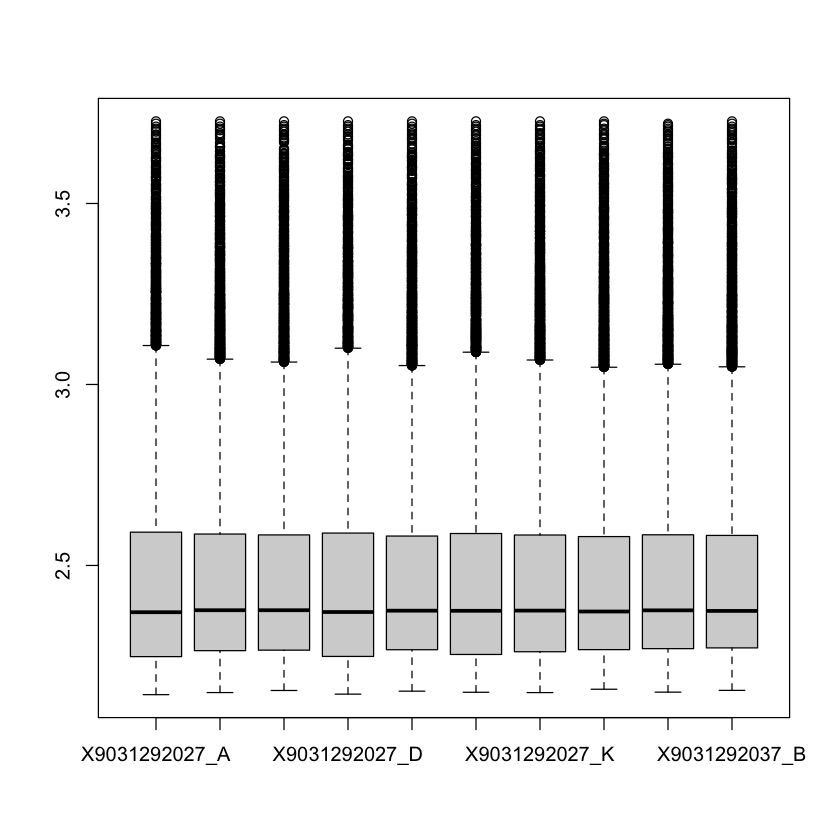

In [28]:
boxplot(log2(GE_mapped[, seq(1,10)]))

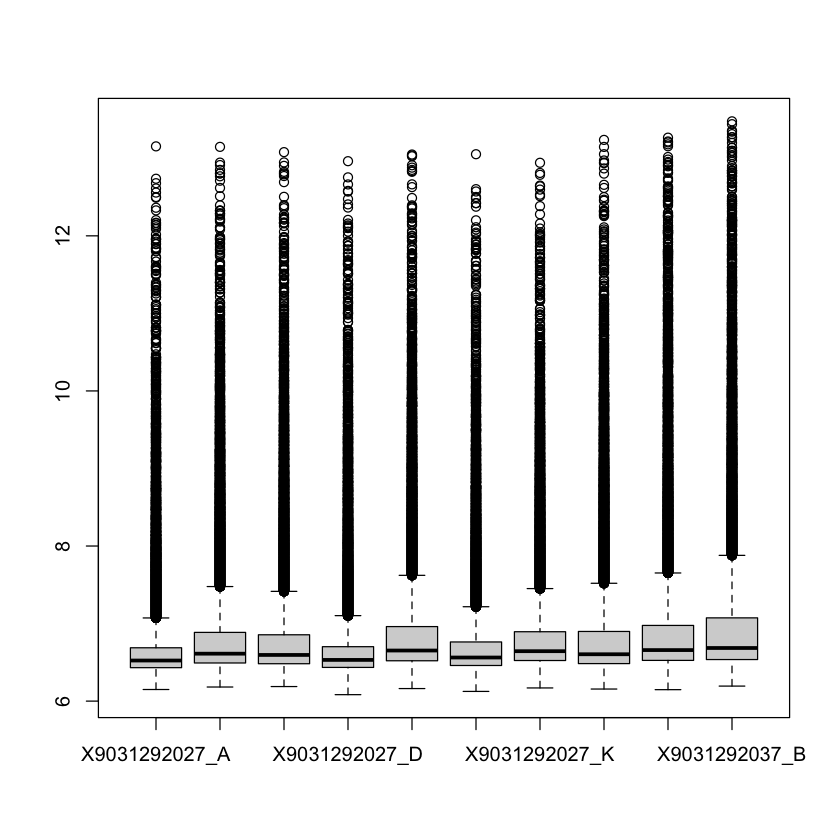

In [21]:
boxplot(log2(GE[, seq(1,10)]))

In [42]:
library(GEOquery)
gse <- getGEO("GSE118553", GSEMatrix = TRUE)


Found 1 file(s)

GSE118553_series_matrix.txt.gz



In [50]:
feature <- fData(gse[[1]])[, c("ID","ILMN_Gene")]
feature


ID           ILMN_Gene  
ILMN_1343291 ILMN_1343291 EEF1A1     
ILMN_1343295 ILMN_1343295 GAPDH      
ILMN_1651199 ILMN_1651199 LOC643334  
ILMN_1651209 ILMN_1651209 SLC35E2    
ILMN_1651210 ILMN_1651210 DUSP22     
ILMN_1651221 ILMN_1651221 LOC642820  
ILMN_1651228 ILMN_1651228 RPS28      
ILMN_1651229 ILMN_1651229 IPO13      
ILMN_1651230 ILMN_1651230 TESSP1     
ILMN_1651232 ILMN_1651232 LOC653113  
ILMN_1651235 ILMN_1651235 AFAP1      
ILMN_1651236 ILMN_1651236 GGTLC1     
ILMN_1651237 ILMN_1651237 CDT1       
ILMN_1651238 ILMN_1651238 TRPV1      
ILMN_1651249 ILMN_1651249 LOC652879  
ILMN_1651253 ILMN_1651253 LOC644150  
ILMN_1651254 ILMN_1651254 LPP        
ILMN_1651259 ILMN_1651259 FLJ36848   
ILMN_1651260 ILMN_1651260 CCNE2      
ILMN_1651262 ILMN_1651262 HNRNPAB    
ILMN_1651268 ILMN_1651268 LOH12CR1   
ILMN_1651278 ILMN_1651278 SNIP1      
ILMN_1651279 ILMN_1651279 LOC645349  
ILMN_1651281 ILMN_1651281 LOC389669  
ILMN_1651282 ILMN_1651282 COL17A1    
ILMN_1651285 ILMN_1651285 BCL6B      
ILMN_1651286 ILMN_1651286 GRHL1      
ILMN_1651288 ILMN_1651288 LOC339760  
ILMN_1651292 ILMN_1651292 LOC644613  
ILMN_1651296 ILMN_1651296 LOC143666  
...          ...          ...        
ILMN_3311045 ILMN_3311045 MIR216A    
ILMN_3311050 ILMN_3311050 MIR384     
ILMN_3311055 ILMN_3311055 MIR1257    
ILMN_3311060 ILMN_3311060 MIR375     
ILMN_3311065 ILMN_3311065 MIR152     
ILMN_3311070 ILMN_3311070 MIR33B     
ILMN_3311075 ILMN_3311075 MIR1915    
ILMN_3311080 ILMN_3311080 MIR490     
ILMN_3311085 ILMN_3311085 SNORD114-2 
ILMN_3311090 ILMN_3311090 MIR551B    
ILMN_3311095 ILMN_3311095 MIR643     
ILMN_3311100 ILMN_3311100 MIRLET7A1  
ILMN_3311105 ILMN_3311105 SNORD114-13
ILMN_3311110 ILMN_3311110 MIR335     
ILMN_3311115 ILMN_3311115 MIR663B    
ILMN_3311120 ILMN_3311120 MIR548P    
ILMN_3311125 ILMN_3311125 MIR320C1   
ILMN_3311130 ILMN_3311130 MIR1255B2  
ILMN_3311135 ILMN_3311135 FOXO6      
ILMN_3311140 ILMN_3311140 BEYLA      
ILMN_3311145 ILMN_3311145 MGC11082   
ILMN_3311150 ILMN_3311150 BEYLA      
ILMN_3311155 ILMN_3311155 FOXO6      
ILMN_3311160 ILMN_3311160 MGC11082   
ILMN_3311165 ILMN_3311165 NCRNA00173 
ILMN_3311170 ILMN_3311170 SKCG-1     
ILMN_3311175 ILMN_3311175 ESP33      
ILMN_3311180 ILMN_3311180 SKCG-1     
ILMN_3311185 ILMN_3311185 ESP33      
ILMN_3311190 ILMN_3311190 NCRNA00173

In [53]:
samples <- pData(gse[[1]])#[, c("ID","ILMN_Gene")]
t(head(samples,3))


GSM3332689                                                                                                                                                                                                                                                
title                   Temporal_Cortex AD (9371242065_I)                                                                                                                                                                                                                         
geo_accession           GSM3332689                                                                                                                                                                                                                                                
status                  Public on Jul 22 2019                                                                                                                                                                                                                                     
submission_date         Aug 14 2018                                                                                                                                                                                                                                               
last_update_date        Jul 22 2019                                                                                                                                                                                                                                               
type                    RNA                                                                                                                                                                                                                                                       
channel_count           1                                                                                                                                                                                                                                                         
source_name_ch1         Temporal_Cortex                                                                                                                                                                                                                                           
organism_ch1            Homo sapiens                                                                                                                                                                                                                                              
characteristics_ch1     gender: FEMALE                                                                                                                                                                                                                                            
characteristics_ch1.1   age: 84                                                                                                                                                                                                                                                   
characteristics_ch1.2   individual: Subject  1                                                                                                                                                                                                                                    
characteristics_ch1.3   tissue: Temporal_Cortex                                                                                                                                                                                                                                   
characteristics_ch1.4   disease state: AD                                                                                                                                     

In [2]:
#P-value matrix construction
value = as.numeric(data$Detection_Pval)
data$Detection_Pval = value
pval = acast(data, ILMN_Probe_ID~zz_nr, value.var="Detection_Pval")

ERROR: Error in data$Detection_Pval: object of type 'closure' is not subsettable


In [1]:

GE_bgCorrected = neqc(GE, detection.p= pval)

ERROR: Error in neqc(GE, detection.p = pval): could not find function "neqc"


In [3]:
Conversion_table = unique(data[,2:3])
Conversion_table

V2           V3                         
1     9031292027_A 9031292027_A_Detection_Pval
2      83.7        0.74805                    
3      86.6        0.57403                    
4      94.9        0.18701                    
5     107.8        0.05974                    
6      86.0        0.6039                     
7      83.6        0.74805                    
8      97.2        0.15195                    
9      82.1        0.82468                    
10    101.1        0.0974                     
11     86.9        0.55065                    
12    100.9        0.0987                     
13     92.6        0.26753                    
15     94.5        0.1974                     
16     99.3        0.11948                    
17     85.7        0.61429                    
18     99.8        0.10909                    
19    100.9        0.0974                     
20     99.9        0.10909                    
21     95.6        0.17792                    
22    174.9        0.00909                    
23     89.3        0.42078                    
24    215.2        0                          
25     93.1        0.24935                    
26     96.5        0.15714                    
27     83.1        0.77922                    
28     85.9        0.60519                    
29     83.7        0.74286                    
30     84.9        0.65974                    
31    83.1         0.77922                    
...   ...          ...                        
46418  184.0       0.00519                    
46475  551.0       0                          
46477  3568.4      0                          
46489 227.7        0                          
46507 80.5         0.88701                    
46528  189.1       0.00519                    
46543 1378.7       0                          
46589 282.9        0                          
46608  231.9       0                          
46669  180.2       0.00779                    
46677  1494.9      0                          
46687  694.2       0                          
46784 249.5        0                          
46800 85.7         0.61299                    
46803 80.5         0.88442                    
46886  307.7       0                          
46897  701.4       0                          
46987  170.3       0.00909                    
46994  117.7       0.04545                    
47031  382.3       0                          
47060  309.1       0                          
47147  467.6       0                          
47164  84.5        0.69351                    
47174 251.8        0                          
47185  303.5       0                          
47194 175.9        0.00909                    
47232  514.6       0                          
47260  516.4       0                          
47262  397.4       0                          
47285  541.3       0